In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
audcad = pd.read_csv('AUDCAD1440.csv', sep=',')
audchf = pd.read_csv('AUDCHF1440.csv', sep=",")
audjpy  = pd.read_csv('AUDJPY1440.csv', sep=",")
audnzd = pd.read_csv('AUDNZD1440.csv', sep=",")
audusd =pd.read_csv('AUDUSD1440.csv', sep=",")
cadchf  = pd.read_csv('CADCHF1440.csv', sep=",")
cadjpy  = pd.read_csv('CADJPY1440.csv', sep=",")
chfjpy  = pd.read_csv('CHFJPY1440.csv', sep=",")
euraud = pd.read_csv('EURAUD1440.csv', sep=",")
eurcad = pd.read_csv('EURCAD1440.csv', sep=",")
eurchf = pd.read_csv('EURCHF1440.csv', sep=",")
eurgbp = pd.read_csv('EURGBP1440.csv', sep=",")
eurjpy  = pd.read_csv('EURJPY1440.csv', sep=",")
eurnzd = pd.read_csv('EURNZD1440.csv', sep=",")
eurusd = pd.read_csv('EURUSD1440.csv', sep=',')
gbpchf = pd.read_csv('GBPCHF1440.csv', sep=",")
gbpjpy = pd.read_csv('GBPJPY1440.csv', sep=",")
gbpusd = pd.read_csv('GBPUSD1440.csv', sep=",")
nzdjpy = pd.read_csv('NZDJPY1440.csv', sep=",")
nzdusd = pd.read_csv('NZDUSD1440.csv', sep=",")
usdcad = pd.read_csv('USDCAD1440.csv', sep=",")
usdjpy = pd.read_csv('USDJPY1440.csv', sep=",")

In [3]:
def prepare_data(dataset):
    dataset.columns = ['Data','Hora','Abertura','Maxima','Minima','Fechamento','Volume']
    dataset = dataset.dropna()
    dataset['Y'] = ((dataset['Fechamento'].shift(-3)/dataset['Fechamento'])-1) * 100
    dataset['m20'] = dataset['Fechamento'].rolling(20).mean()
    dataset['RSL'] = (dataset['Fechamento'] - dataset['m20'])
    dataset = dataset.set_index('Data')
    dataset = dataset.dropna()
    return(dataset)

In [4]:
def sinal_pontos (dataset, compra = [],venda = []):
    sinal = np.where(dataset['Classe RSL'].isin(compra),1,
                     np.where(dataset['Classe RSL'].isin(venda),-1,0))
    pontos = dataset['Y'] * sinal
    return(sinal,pontos)

In [80]:
def sharpe(dataset = None, taxa_livre = 10.1, cortarA = False, corteA= None, cortarB = False, corteB= None, retornos = 'Pontos'):
    if ((cortarA == True) & (cortarB == False)):
        pontos = dataset[retornos][:corteA].values
    if((cortarA == True) & (cortarB == True)):
        pontos = dataset[retornos][corteA:corteB].values
    if((cortarA == False) & (cortarB == False)):
        pontos = dataset[retornos].values
    indice_sharpe = (np.mean(pontos) - (10.1/365))/np.std(pontos)
    return(indice_sharpe)

In [6]:
def get_MonteCarlo(dataset):
    media_sim = []
    media = dataset['Media Pontos t-n']
    dp = dataset['Desvio Padrão Pontos t-n']
    for i in range(100):
        sim = None
        
        media_ = None
        sim = np.random.normal(media,dp,30)
        media_ = np.mean(sim)
    media_sim.append(np.mean(media_))
    media_sim = np.array(media_sim)
    return(media_sim[0])

In [7]:
def get_Sim_Index(dataset = None, periodo_simulado = 30):   
    montesimindex = []
    for i in range (0,len(dataset)):
        if(i % periodo_simulado == 0):
            montesimindex.append(1)
        else:
            montesimindex.append(0)
    return(montesimindex)

In [8]:
def prepare_data_to_sim (dataset = None, periodo_simulado = 30):
    dataset['Contador Monte Carlo'] = get_Sim_Index(dataset = dataset, 
                                                    periodo_simulado = periodo_simulado)
    dataset['Media Pontos t-n'] = dataset['Pontos'].rolling(periodo_simulado).mean()
    dataset['Desvio Padrão Pontos t-n'] = dataset['Pontos'].rolling(periodo_simulado).std()
    dataset = dataset.dropna()
    return(dataset)

In [9]:
def Filtro_Pontos_Monte_Carlo(dataset):
    Filtro = np.where(dataset['Contador Monte Carlo'] == 1, 
                                           dataset['Monte Carlo'],dataset['Monte Carlo'].shift())
    SinalMC = np.where(Filtro>0,dataset['Sinal'], 0)
    PontosMC = SinalMC * dataset['Pontos']
    return(Filtro,SinalMC,PontosMC)

In [10]:
audchf  = prepare_data(audchf)
audjpy  = prepare_data(audjpy)
audnzd  = prepare_data(audnzd)
audusd  = prepare_data(audusd)
audcad  = prepare_data(audcad)
cadchf  = prepare_data(cadchf)
cadjpy  = prepare_data(cadjpy)
chfjpy  = prepare_data(chfjpy)
euraud  = prepare_data(euraud)
eurcad  = prepare_data(eurcad)
eurchf  = prepare_data(eurchf)
eurgbp  = prepare_data(eurgbp)
eurjpy  = prepare_data(eurjpy)
eurnzd  = prepare_data(eurnzd)
eurusd  = prepare_data(eurusd)
gbpchf  = prepare_data(gbpchf)
gbpjpy  = prepare_data(gbpjpy)
gbpusd  = prepare_data(gbpusd)
nzdjpy  = prepare_data(nzdjpy)
nzdusd  = prepare_data(nzdusd)
usdcad  = prepare_data(usdcad)
usdjpy  = prepare_data(usdjpy)


In [11]:
audchf.dropna()
audjpy.dropna()
audnzd.dropna()
audusd.dropna()
cadchf.dropna()
cadjpy.dropna()
chfjpy.dropna()
euraud.dropna()
eurcad.dropna()
eurchf.dropna()
eurgbp.dropna()
eurjpy.dropna()
eurnzd.dropna()
eurusd.dropna()
gbpchf.dropna()
gbpjpy.dropna()
gbpusd.dropna()
nzdjpy.dropna()
nzdusd.dropna()
usdcad.dropna()
usdjpy.dropna()


,Hora,Abertura,Maxima,Minima,Fechamento,Volume,Y,m20,RSL
Data,,,,,,,,,
2001.01.16,00:00,118.670,119.210,117.030,117.860,356,-0.534532,115.28300,2.57700
2001.01.17,00:00,117.740,118.970,116.880,118.970,296,-2.101370,115.59050,3.37950
2001.01.18,00:00,118.890,119.910,117.580,118.130,391,-1.185135,115.88250,2.24750
2001.01.19,00:00,118.030,118.380,116.950,117.230,207,0.580056,116.09750,1.13250
2001.01.22,00:00,117.050,117.240,116.140,116.470,163,0.334850,116.27250,0.19750
2001.01.23,00:00,116.370,117.450,116.370,116.730,181,0.573974,116.42500,0.30500
2001.01.24,00:00,116.660,118.540,116.490,117.910,286,-0.958358,116.60900,1.30100
2001.01.25,00:00,117.820,118.200,116.350,116.860,275,-0.821496,116.72800,0.13200
2001.01.26,00:00,116.770,117.620,116.290,117.400,204,-0.681431,116.87500,0.52500


In [12]:
audcad.head()

,Hora,Abertura,Maxima,Minima,Fechamento,Volume,Y,m20,RSL
Data,,,,,,,,,
1993.05.25,00:00,0.8833,0.8833,0.8833,0.8833,1,-0.962300,0.891425,-0.008125
1993.05.26,00:00,0.8828,0.8828,0.8828,0.8828,1,-2.288174,0.890225,-0.007425
1993.05.27,00:00,0.8774,0.8774,0.8774,0.8774,1,-1.720994,0.888895,-0.011495
1993.05.28,00:00,0.8748,0.8748,0.8748,0.8748,1,-1.566072,0.887685,-0.012885
1993.05.31,00:00,0.8626,0.8626,0.8626,0.8626,1,0.649200,0.886040,-0.023440


In [13]:
print('audchf' ,audchf.shape[0])
print('audjpy'  ,audjpy.shape[0])
print('audnzd' ,audnzd.shape[0])
print('audusd' ,audusd.shape[0])
print('cadchf'  ,cadchf.shape[0])
print('cadjpy'  ,cadjpy.shape[0])
print('chfjpy'  ,chfjpy.shape[0])
print('euraud' ,euraud.shape[0])
print('eurcad' ,eurcad.shape[0])
print('eurchf' ,eurchf.shape[0])
print('eurgbp' ,eurgbp.shape[0])
print('eurjpy'  ,eurjpy.shape[0])
print('eurnzd' ,eurnzd.shape[0])
print('eurusd' ,eurusd.shape[0])
print('gbpchf' ,gbpchf.shape[0])
print('gbpjpy' ,gbpjpy.shape[0])
print('gbpusd' ,gbpusd.shape[0])
print('nzdjpy' ,nzdjpy.shape[0])
print('nzdusd' ,nzdusd.shape[0])
print('usdcad' ,usdcad.shape[0])
print('usdjpy' ,usdjpy.shape[0])


audchf 5263
audjpy 4459
audnzd 4459
audusd 5263
cadchf 5263
cadjpy 4459
chfjpy 4459
euraud 4559
eurcad 4545
eurchf 5263
eurgbp 5263
eurjpy 5263
eurnzd 4449
eurusd 5263
gbpchf 5263
gbpjpy 5263
gbpusd 5263
nzdjpy 5232
nzdusd 5263
usdcad 5263
usdjpy 5263


In [14]:
audjpy  = audjpy[audjpy.index.isin(eurnzd.index)]
audnzd  = audnzd[audnzd.index.isin(audjpy.index)]

audchf  = audchf[audchf.index.isin(audjpy.index)]
cadchf  = cadchf[cadchf.index.isin(audjpy.index)]
cadjpy  = cadjpy[cadjpy.index.isin(audjpy.index)]
chfjpy  = chfjpy[chfjpy.index.isin(audjpy.index)]

euraud  = euraud[euraud.index.isin(audjpy.index)]
eurcad  = eurcad[eurcad.index.isin(audjpy.index)]
eurchf  = eurchf[eurchf.index.isin(audjpy.index)]
eurgbp  = eurgbp[eurgbp.index.isin(audjpy.index)]

eurjpy  = eurjpy[eurjpy.index.isin(audjpy.index)]
eurusd  = eurusd[eurusd.index.isin(audjpy.index)]
gbpchf  = gbpchf[gbpchf.index.isin(audjpy.index)]
gbpjpy  = gbpjpy[gbpjpy.index.isin(audjpy.index)]
gbpusd  = gbpusd[gbpusd.index.isin(audjpy.index)]
nzdjpy  = nzdjpy[nzdjpy.index.isin(audjpy.index)]
nzdusd  = nzdusd[nzdusd.index.isin(audjpy.index)]
usdcad  = usdcad[usdcad.index.isin(audjpy.index)]
usdjpy  = usdjpy[usdjpy.index.isin(audjpy.index)]

print('audchf' ,audchf.shape[0])
print('audjpy'  ,audjpy.shape[0])
print('audnzd' ,audnzd.shape[0])
print('audusd' ,audusd.shape[0])
print('cadchf'  ,cadchf.shape[0])
print('cadjpy'  ,cadjpy.shape[0])
print('chfjpy'  ,chfjpy.shape[0])
print('euraud' ,euraud.shape[0])
print('eurcad' ,eurcad.shape[0])
print('eurchf' ,eurchf.shape[0])
print('eurgbp' ,eurgbp.shape[0])
print('eurjpy'  ,eurjpy.shape[0])
print('eurnzd' ,eurnzd.shape[0])
print('eurusd' ,eurusd.shape[0])
print('gbpchf' ,gbpchf.shape[0])
print('gbpjpy' ,gbpjpy.shape[0])
print('gbpusd' ,gbpusd.shape[0])
print('nzdjpy' ,nzdjpy.shape[0])
print('nzdusd' ,nzdusd.shape[0])
print('usdcad' ,usdcad.shape[0])
print('usdjpy' ,usdjpy.shape[0])


audchf 4347
audjpy 4401
audnzd 4401
audusd 5263
cadchf 4347
cadjpy 4401
chfjpy 4401
euraud 4401
eurcad 4400
eurchf 4313
eurgbp 4313
eurjpy 4313
eurnzd 4449
eurusd 4313
gbpchf 4313
gbpjpy 4313
gbpusd 4313
nzdjpy 4316
nzdusd 4742
usdcad 4313
usdjpy 4313


In [15]:
audjpy  = audjpy[audjpy.index.isin(usdjpy.index)]
audnzd  = audnzd[audnzd.index.isin(audjpy.index)]
audusd  = audusd[audusd.index.isin(audjpy.index)]

audchf  = audchf[audchf.index.isin(audjpy.index)]
cadchf  = cadchf[cadchf.index.isin(audjpy.index)]
cadjpy  = cadjpy[cadjpy.index.isin(audjpy.index)]
chfjpy  = chfjpy[chfjpy.index.isin(audjpy.index)]

euraud  = euraud[euraud.index.isin(audjpy.index)]
eurcad  = eurcad[eurcad.index.isin(audjpy.index)]
eurchf  = eurchf[eurchf.index.isin(audjpy.index)]
eurgbp  = eurgbp[eurgbp.index.isin(audjpy.index)]

eurjpy  = eurjpy[eurjpy.index.isin(audjpy.index)]
eurusd  = eurusd[eurusd.index.isin(audjpy.index)]
gbpchf  = gbpchf[gbpchf.index.isin(audjpy.index)]
gbpjpy  = gbpjpy[gbpjpy.index.isin(audjpy.index)]
gbpusd  = gbpusd[gbpusd.index.isin(audjpy.index)]
nzdjpy  = nzdjpy[nzdjpy.index.isin(audjpy.index)]
nzdusd  = nzdusd[nzdusd.index.isin(audjpy.index)]
usdcad  = usdcad[usdcad.index.isin(audjpy.index)]
eurnzd  = eurnzd[eurnzd.index.isin(audjpy.index)]

print('audchf' ,audchf.shape[0])
print('audjpy'  ,audjpy.shape[0])
print('audnzd' ,audnzd.shape[0])
print('audusd' ,audusd.shape[0])
print('cadchf'  ,cadchf.shape[0])
print('cadjpy'  ,cadjpy.shape[0])
print('chfjpy'  ,chfjpy.shape[0])
print('euraud' ,euraud.shape[0])
print('eurcad' ,eurcad.shape[0])
print('eurchf' ,eurchf.shape[0])
print('eurgbp' ,eurgbp.shape[0])
print('eurjpy'  ,eurjpy.shape[0])
print('eurnzd' ,eurnzd.shape[0])
print('eurusd' ,eurusd.shape[0])
print('gbpchf' ,gbpchf.shape[0])
print('gbpjpy' ,gbpjpy.shape[0])
print('gbpusd' ,gbpusd.shape[0])
print('nzdjpy' ,nzdjpy.shape[0])
print('nzdusd' ,nzdusd.shape[0])
print('usdcad' ,usdcad.shape[0])
print('usdjpy' ,usdjpy.shape[0])


audchf 4259
audjpy 4313
audnzd 4313
audusd 4313
cadchf 4259
cadjpy 4313
chfjpy 4313
euraud 4313
eurcad 4312
eurchf 4313
eurgbp 4313
eurjpy 4313
eurnzd 4313
eurusd 4313
gbpchf 4313
gbpjpy 4313
gbpusd 4313
nzdjpy 4232
nzdusd 4654
usdcad 4313
usdjpy 4313


In [16]:
audjpy  = audjpy[audjpy.index.isin(nzdjpy.index)]
audnzd  = audnzd[audnzd.index.isin(audjpy.index)]
audusd  = audusd[audusd.index.isin(audjpy.index)]
usdjpy  = usdjpy[usdjpy.index.isin(audjpy.index)]

audchf  = audchf[audchf.index.isin(audjpy.index)]
cadchf  = cadchf[cadchf.index.isin(audjpy.index)]
cadjpy  = cadjpy[cadjpy.index.isin(audjpy.index)]
chfjpy  = chfjpy[chfjpy.index.isin(audjpy.index)]

euraud  = euraud[euraud.index.isin(audjpy.index)]
eurcad  = eurcad[eurcad.index.isin(audjpy.index)]
eurchf  = eurchf[eurchf.index.isin(audjpy.index)]
eurgbp  = eurgbp[eurgbp.index.isin(audjpy.index)]

eurjpy  = eurjpy[eurjpy.index.isin(audjpy.index)]
eurusd  = eurusd[eurusd.index.isin(audjpy.index)]
gbpchf  = gbpchf[gbpchf.index.isin(audjpy.index)]
gbpjpy  = gbpjpy[gbpjpy.index.isin(audjpy.index)]
gbpusd  = gbpusd[gbpusd.index.isin(audjpy.index)]
nzdjpy  = nzdjpy[nzdjpy.index.isin(audjpy.index)]
nzdusd  = nzdusd[nzdusd.index.isin(audjpy.index)]
usdcad  = usdcad[usdcad.index.isin(audjpy.index)]
eurnzd  = eurnzd[eurnzd.index.isin(audjpy.index)]

print('audchf' ,audchf.shape[0])
print('audjpy'  ,audjpy.shape[0])
print('audnzd' ,audnzd.shape[0])
print('audusd' ,audusd.shape[0])
print('cadchf'  ,cadchf.shape[0])
print('cadjpy'  ,cadjpy.shape[0])
print('chfjpy'  ,chfjpy.shape[0])
print('euraud' ,euraud.shape[0])
print('eurcad' ,eurcad.shape[0])
print('eurchf' ,eurchf.shape[0])
print('eurgbp' ,eurgbp.shape[0])
print('eurjpy'  ,eurjpy.shape[0])
print('eurnzd' ,eurnzd.shape[0])
print('eurusd' ,eurusd.shape[0])
print('gbpchf' ,gbpchf.shape[0])
print('gbpjpy' ,gbpjpy.shape[0])
print('gbpusd' ,gbpusd.shape[0])
print('nzdjpy' ,nzdjpy.shape[0])
print('nzdusd' ,nzdusd.shape[0])
print('usdcad' ,usdcad.shape[0])
print('usdjpy' ,usdjpy.shape[0])


audchf 4231
audjpy 4232
audnzd 4232
audusd 4232
cadchf 4231
cadjpy 4232
chfjpy 4232
euraud 4232
eurcad 4231
eurchf 4232
eurgbp 4232
eurjpy 4232
eurnzd 4232
eurusd 4232
gbpchf 4232
gbpjpy 4232
gbpusd 4232
nzdjpy 4232
nzdusd 4548
usdcad 4232
usdjpy 4232


In [17]:
audjpy  = audjpy[audjpy.index.isin(audchf.index)]
audnzd  = audnzd[audnzd.index.isin(audjpy.index)]
audusd  = audusd[audusd.index.isin(audjpy.index)]
usdjpy  = usdjpy[usdjpy.index.isin(audjpy.index)]

audchf  = audchf[audchf.index.isin(audjpy.index)]
cadchf  = cadchf[cadchf.index.isin(audjpy.index)]
cadjpy  = cadjpy[cadjpy.index.isin(audjpy.index)]
chfjpy  = chfjpy[chfjpy.index.isin(audjpy.index)]

euraud  = euraud[euraud.index.isin(audjpy.index)]
eurcad  = eurcad[eurcad.index.isin(audjpy.index)]
eurchf  = eurchf[eurchf.index.isin(audjpy.index)]
eurgbp  = eurgbp[eurgbp.index.isin(audjpy.index)]

eurjpy  = eurjpy[eurjpy.index.isin(audjpy.index)]
eurusd  = eurusd[eurusd.index.isin(audjpy.index)]
gbpchf  = gbpchf[gbpchf.index.isin(audjpy.index)]
gbpjpy  = gbpjpy[gbpjpy.index.isin(audjpy.index)]
gbpusd  = gbpusd[gbpusd.index.isin(audjpy.index)]
nzdjpy  = nzdjpy[nzdjpy.index.isin(audjpy.index)]
usdcad  = usdcad[usdcad.index.isin(audjpy.index)]
eurnzd  = eurnzd[eurnzd.index.isin(audjpy.index)]

print('audchf' ,audchf.shape[0])
print('audjpy'  ,audjpy.shape[0])
print('audnzd' ,audnzd.shape[0])
print('audusd' ,audusd.shape[0])
print('cadchf'  ,cadchf.shape[0])
print('cadjpy'  ,cadjpy.shape[0])
print('chfjpy'  ,chfjpy.shape[0])
print('euraud' ,euraud.shape[0])
print('eurcad' ,eurcad.shape[0])
print('eurchf' ,eurchf.shape[0])
print('eurgbp' ,eurgbp.shape[0])
print('eurjpy'  ,eurjpy.shape[0])
print('eurnzd' ,eurnzd.shape[0])
print('eurusd' ,eurusd.shape[0])
print('gbpchf' ,gbpchf.shape[0])
print('gbpjpy' ,gbpjpy.shape[0])
print('gbpusd' ,gbpusd.shape[0])
print('nzdjpy' ,nzdjpy.shape[0])
print('usdcad' ,usdcad.shape[0])
print('usdjpy' ,usdjpy.shape[0])


audchf 4231
audjpy 4231
audnzd 4231
audusd 4231
cadchf 4230
cadjpy 4231
chfjpy 4231
euraud 4231
eurcad 4230
eurchf 4231
eurgbp 4231
eurjpy 4231
eurnzd 4231
eurusd 4231
gbpchf 4231
gbpjpy 4231
gbpusd 4231
nzdjpy 4231
usdcad 4231
usdjpy 4231


In [18]:
audjpy  = audjpy[audjpy.index.isin(eurcad.index)]
audnzd  = audnzd[audnzd.index.isin(audjpy.index)]
audusd  = audusd[audusd.index.isin(audjpy.index)]
usdjpy  = usdjpy[usdjpy.index.isin(audjpy.index)]
audcad  = audcad[audcad.index.isin(audjpy.index)]
audchf  = audchf[audchf.index.isin(audjpy.index)]
cadchf  = cadchf[cadchf.index.isin(audjpy.index)]
cadjpy  = cadjpy[cadjpy.index.isin(audjpy.index)]
chfjpy  = chfjpy[chfjpy.index.isin(audjpy.index)]

euraud  = euraud[euraud.index.isin(audjpy.index)]
eurcad  = eurcad[eurcad.index.isin(audjpy.index)]
eurchf  = eurchf[eurchf.index.isin(audjpy.index)]
eurgbp  = eurgbp[eurgbp.index.isin(audjpy.index)]

eurjpy  = eurjpy[eurjpy.index.isin(audjpy.index)]
eurusd  = eurusd[eurusd.index.isin(audjpy.index)]
gbpchf  = gbpchf[gbpchf.index.isin(audjpy.index)]
gbpjpy  = gbpjpy[gbpjpy.index.isin(audjpy.index)]
gbpusd  = gbpusd[gbpusd.index.isin(audjpy.index)]
nzdjpy  = nzdjpy[nzdjpy.index.isin(audjpy.index)]
usdcad  = usdcad[usdcad.index.isin(audjpy.index)]
eurnzd  = eurnzd[eurnzd.index.isin(audjpy.index)]

print('audchf' ,audchf.shape[0])
print('audjpy'  ,audjpy.shape[0])
print('audnzd' ,audnzd.shape[0])
print('audusd' ,audusd.shape[0])
print('cadchf'  ,cadchf.shape[0])
print('cadjpy'  ,cadjpy.shape[0])
print('chfjpy'  ,chfjpy.shape[0])
print('euraud' ,euraud.shape[0])
print('eurcad' ,eurcad.shape[0])
print('eurchf' ,eurchf.shape[0])
print('eurgbp' ,eurgbp.shape[0])
print('eurjpy'  ,eurjpy.shape[0])
print('eurnzd' ,eurnzd.shape[0])
print('eurusd' ,eurusd.shape[0])
print('gbpchf' ,gbpchf.shape[0])
print('gbpjpy' ,gbpjpy.shape[0])
print('gbpusd' ,gbpusd.shape[0])
print('nzdjpy' ,nzdjpy.shape[0])
print('usdcad' ,usdcad.shape[0])
print('usdjpy' ,usdjpy.shape[0])


audchf 4230
audjpy 4230
audnzd 4230
audusd 4230
cadchf 4229
cadjpy 4230
chfjpy 4230
euraud 4230
eurcad 4230
eurchf 4230
eurgbp 4230
eurjpy 4230
eurnzd 4230
eurusd 4230
gbpchf 4230
gbpjpy 4230
gbpusd 4230
nzdjpy 4230
usdcad 4230
usdjpy 4230


In [19]:
audjpy  = audjpy[audjpy.index.isin(cadchf.index)]
audnzd  = audnzd[audnzd.index.isin(audjpy.index)]
audusd  = audusd[audusd.index.isin(audjpy.index)]
usdjpy  = usdjpy[usdjpy.index.isin(audjpy.index)]
audcad  = audcad[audcad.index.isin(audjpy.index)]
audchf  = audchf[audchf.index.isin(audjpy.index)]
cadchf  = cadchf[cadchf.index.isin(audjpy.index)]
cadjpy  = cadjpy[cadjpy.index.isin(audjpy.index)]
chfjpy  = chfjpy[chfjpy.index.isin(audjpy.index)]

euraud  = euraud[euraud.index.isin(audjpy.index)]
eurcad  = eurcad[eurcad.index.isin(audjpy.index)]
eurchf  = eurchf[eurchf.index.isin(audjpy.index)]
eurgbp  = eurgbp[eurgbp.index.isin(audjpy.index)]

eurjpy  = eurjpy[eurjpy.index.isin(audjpy.index)]
eurusd  = eurusd[eurusd.index.isin(audjpy.index)]
gbpchf  = gbpchf[gbpchf.index.isin(audjpy.index)]
gbpjpy  = gbpjpy[gbpjpy.index.isin(audjpy.index)]
gbpusd  = gbpusd[gbpusd.index.isin(audjpy.index)]
nzdjpy  = nzdjpy[nzdjpy.index.isin(audjpy.index)]
usdcad  = usdcad[usdcad.index.isin(audjpy.index)]
eurnzd  = eurnzd[eurnzd.index.isin(audjpy.index)]

print('audchf' ,audchf.shape[0])
print('audjpy'  ,audjpy.shape[0])
print('audnzd' ,audnzd.shape[0])
print('audusd' ,audusd.shape[0])
print('cadchf'  ,cadchf.shape[0])
print('cadjpy'  ,cadjpy.shape[0])
print('chfjpy'  ,chfjpy.shape[0])
print('euraud' ,euraud.shape[0])
print('eurcad' ,eurcad.shape[0])
print('eurchf' ,eurchf.shape[0])
print('eurgbp' ,eurgbp.shape[0])
print('eurjpy'  ,eurjpy.shape[0])
print('eurnzd' ,eurnzd.shape[0])
print('eurusd' ,eurusd.shape[0])
print('gbpchf' ,gbpchf.shape[0])
print('gbpjpy' ,gbpjpy.shape[0])
print('gbpusd' ,gbpusd.shape[0])
print('nzdjpy' ,nzdjpy.shape[0])
print('usdcad' ,usdcad.shape[0])
print('usdjpy' ,usdjpy.shape[0])


audchf 4229
audjpy 4229
audnzd 4229
audusd 4229
cadchf 4229
cadjpy 4229
chfjpy 4229
euraud 4229
eurcad 4229
eurchf 4229
eurgbp 4229
eurjpy 4229
eurnzd 4229
eurusd 4229
gbpchf 4229
gbpjpy 4229
gbpusd 4229
nzdjpy 4229
usdcad 4229
usdjpy 4229


In [20]:
audchf.dropna()
audjpy.dropna()
audnzd.dropna()
audusd.dropna()
cadchf.dropna()
cadjpy.dropna()
chfjpy.dropna()
euraud.dropna()
eurcad.dropna()
eurchf.dropna()
eurgbp.dropna()
eurjpy.dropna()
eurnzd.dropna()
eurusd.dropna()
gbpchf.dropna()
gbpjpy.dropna()
gbpusd.dropna()
nzdjpy.dropna()
nzdusd.dropna()
usdcad.dropna()
usdjpy.dropna()


,Hora,Abertura,Maxima,Minima,Fechamento,Volume,Y,m20,RSL
Data,,,,,,,,,
2004.04.13,00:00,105.390,107.030,105.050,106.820,5976,0.851900,105.95000,0.87000
2004.04.14,00:00,106.820,109.000,106.700,108.670,6285,-0.220852,105.97050,2.69950
2004.04.15,00:00,108.680,109.260,108.070,108.210,6700,0.720821,106.04050,2.16950
2004.04.19,00:00,107.800,108.710,107.590,108.430,5779,0.913031,106.16900,2.26100
2004.04.20,00:00,108.430,109.140,107.680,108.990,6239,0.183503,106.28000,2.71000
2004.04.21,00:00,108.980,109.790,108.580,109.380,6016,-0.676541,106.42800,2.95200
2004.04.22,00:00,109.360,109.920,109.130,109.420,6302,0.100530,106.59150,2.82850
2004.04.28,00:00,109.540,110.250,108.750,110.040,7437,0.136314,107.38200,2.65800
2004.04.29,00:00,110.040,111.050,109.510,109.950,5909,-0.354707,107.69150,2.25850


In [21]:
eurusd.head()

,Hora,Abertura,Maxima,Minima,Fechamento,Volume,Y,m20,RSL
Data,,,,,,,,,
2004.04.13,00:00,1.2069,1.2086,1.1904,1.1934,5528,0.477627,1.21824,-0.02484
2004.04.14,00:00,1.1936,1.1976,1.1867,1.1946,6485,0.502260,1.21604,-0.02144
2004.04.15,00:00,1.1942,1.1996,1.1893,1.1987,6823,-1.176274,1.21458,-0.01588
2004.04.19,00:00,1.2018,1.2080,1.1998,1.2006,6139,-0.682992,1.21145,-0.01085
2004.04.20,00:00,1.2005,1.2014,1.1820,1.1846,6724,-0.059092,1.20896,-0.02436


In [22]:
eurusd.tail()

,Hora,Abertura,Maxima,Minima,Fechamento,Volume,Y,m20,RSL
Data,,,,,,,,,
2019.08.23,00:00,1.10791,1.11532,1.10518,1.11426,85934,-0.579757,1.113740,0.000520
2019.08.26,00:00,1.11508,1.11640,1.10943,1.10993,107193,-0.386511,1.113512,-0.003582
2019.08.27,00:00,1.11007,1.11161,1.10857,1.10902,70704,-0.904402,1.113193,-0.004173
2019.08.28,00:00,1.10906,1.10979,1.10733,1.10780,65991,-1.006499,1.113207,-0.005407
2019.08.29,00:00,1.10780,1.10930,1.10420,1.10564,69346,-1.005752,1.113070,-0.007430


In [23]:
def classificar_percentile(dataset):
    cut = int(0.5 * len(dataset))
    treino = dataset[:cut]
    
    percentil_rsl = np.where(dataset['RSL'] <= np.percentile(treino['RSL'], q = 5),5,
                             np.where((dataset['RSL'] <= np.percentile(treino['RSL'], q = 10)) & 
                                      (dataset['RSL'] > np.percentile(treino['RSL'], q = 5)),10,
                                      np.where((dataset['RSL'] <= np.percentile(treino['RSL'], q = 15)) & 
                                      (dataset['RSL'] > np.percentile(treino['RSL'], q = 10)),15,
                                               np.where((dataset['RSL'] <= np.percentile(treino['RSL'], q = 20)) & 
                                      (dataset['RSL'] > np.percentile(treino['RSL'], q = 15)),20,
                                                        np.where((dataset['RSL'] <= np.percentile(treino['RSL'], q = 25)) & 
                                      (dataset['RSL'] > np.percentile(treino['RSL'], q = 20)),25,
                                                                 np.where((dataset['RSL'] <= np.percentile(treino['RSL'], q = 30)) & 
                                      (dataset['RSL'] > np.percentile(treino['RSL'], q = 25)),30,
                                                                          np.where(dataset['RSL'] > np.percentile(treino['RSL'], q = 95),100,
                                                                                  np.where((dataset['RSL'] <= np.percentile(treino['RSL'], q = 70)) & 
                                      (dataset['RSL'] > np.percentile(treino['RSL'], q = 65)),70,
                                                                                           np.where((dataset['RSL'] <= np.percentile(treino['RSL'], q = 75)) & 
                                      (dataset['RSL'] > np.percentile(treino['RSL'], q = 70)),75,
                                                                                                    np.where((dataset['RSL'] <= np.percentile(treino['RSL'], q = 80)) & 
                                      (dataset['RSL'] > np.percentile(treino['RSL'], q = 75)),80,
                                                                                                             np.where((dataset['RSL'] <= np.percentile(treino['RSL'], q = 85)) & 
                                      (dataset['RSL'] > np.percentile(treino['RSL'], q = 80)),85,
                                                                                                                      np.where((dataset['RSL'] <= np.percentile(treino['RSL'], q = 90)) & 
                                      (dataset['RSL'] > np.percentile(treino['RSL'], q = 85)),90,
                                                                                                                               np.where((dataset['RSL'] <= np.percentile(treino['RSL'], q = 95)) & 
                                      (dataset['RSL'] > np.percentile(treino['RSL'], q = 90)),95,'Nada')))))))))))))
    return(percentil_rsl)

In [24]:
audchf['Classe RSL'] = classificar_percentile(audchf)
audjpy['Classe RSL'] = classificar_percentile(audjpy) 
audnzd['Classe RSL'] = classificar_percentile(audnzd) 
audusd['Classe RSL'] = classificar_percentile(audusd) 
cadchf['Classe RSL'] = classificar_percentile(cadchf)  
cadjpy['Classe RSL'] = classificar_percentile(cadjpy)  
chfjpy['Classe RSL'] = classificar_percentile(chfjpy)  
euraud['Classe RSL'] = classificar_percentile(euraud)
eurcad['Classe RSL'] = classificar_percentile(eurcad) 
eurchf['Classe RSL'] = classificar_percentile(eurchf) 
eurgbp['Classe RSL'] = classificar_percentile(eurgbp) 
eurjpy['Classe RSL'] = classificar_percentile(eurjpy)  
eurnzd['Classe RSL'] = classificar_percentile(eurnzd) 
eurusd['Classe RSL'] = classificar_percentile(eurusd) 
gbpchf['Classe RSL'] = classificar_percentile(gbpchf) 
gbpjpy['Classe RSL'] = classificar_percentile(gbpjpy) 
gbpusd['Classe RSL'] = classificar_percentile(gbpusd) 
nzdjpy['Classe RSL'] = classificar_percentile(nzdjpy) 
nzdusd['Classe RSL'] = classificar_percentile(nzdusd) 
usdcad['Classe RSL'] = classificar_percentile(usdcad) 
usdjpy['Classe RSL'] = classificar_percentile(usdjpy) 

In [25]:
cut = int(len(eurusd) * 0.5)
cutB = int (len(eurusd) * 0.75)

In [26]:
print(audchf[:cut].groupby('Classe RSL')['Y'].sum())
print('======================= Teste ==========================')
print(audchf[cut:cutB].groupby('Classe RSL')['Y'].sum())
print('======================= Validação ==========================')
print(audchf[cutB:].groupby('Classe RSL')['Y'].sum())


Classe RSL
10     -43.769699
100    -54.916367
15      17.783663
20      41.080226
25       1.300135
30      -2.457172
5       64.555334
70      19.004442
75       8.400537
80       2.955239
85      10.942963
90       2.656428
95      -2.537019
Nada   -24.789990
Name: Y, dtype: float64
======================= Teste ==========================
Classe RSL
10      -6.423994
100    -23.751867
15      -9.716780
20      12.112067
25      -0.347616
30       0.545926
5        9.570383
70       1.492256
75       3.300686
80      -4.277329
85       5.171565
90      -7.804687
95     -12.816695
Nada   -42.578940
Name: Y, dtype: float64
======================= Validação ==========================
Classe RSL
10       8.669461
100     -4.942163
15       4.237036
20      13.521580
25     -17.085057
30      -1.705480
5        6.854181
70       1.110233
75      -0.937360
80     -10.385043
85     -14.842892
90      -6.700430
95       0.125044
Nada     8.504681
Name: Y, dtype: float64


In [27]:
print(audjpy  [:cut].groupby('Classe RSL')['Y'].sum())
print('======================= Teste ==========================')
print(audjpy  [cut:cutB].groupby('Classe RSL')['Y'].sum())
print('======================= Validação ==========================')
print(audjpy  [cutB:].groupby('Classe RSL')['Y'].sum())


Classe RSL
10     -14.842858
100    -33.638150
15     -41.281590
20      12.706560
25       9.807007
30      35.814971
5       37.876714
70       6.138057
75       8.782931
80       3.011035
85      -0.829009
90      23.294332
95      -0.941284
Nada    -8.997466
Name: Y, dtype: float64
======================= Teste ==========================
Classe RSL
10      -3.081576
100     -1.271984
15     -10.256916
20       6.848861
25       8.551378
30      14.559248
5        0.875862
70      11.303606
75      11.178976
80      19.366355
85       8.232307
90      13.110866
95      -8.350876
Nada   -19.597541
Name: Y, dtype: float64
======================= Validação ==========================
Classe RSL
10      -3.958223
100     -7.365438
15      -9.010419
20       5.275438
25      -1.066685
30       3.736938
5       13.541481
70      17.963035
75      -7.541809
80     -16.109794
85     -10.202595
90      -5.075770
95      -9.429872
Nada   -33.904678
Name: Y, dtype: float64


In [28]:
print(audnzd[:cut].groupby('Classe RSL')['Y'].sum())
print('======================= Teste ==========================')
print(audnzd[cut:cutB].groupby('Classe RSL')['Y'].sum())
print('======================= Validação ==========================')
print(audnzd[cutB:].groupby('Classe RSL')['Y'].sum())


Classe RSL
10       3.588959
100      0.577429
15       1.198485
20      -8.643969
25     -12.198573
30       0.213212
5       -1.319836
70       0.663687
75      10.075060
80      11.370883
85      12.498567
90       4.715280
95       0.620811
Nada    27.637451
Name: Y, dtype: float64
======================= Teste ==========================
Classe RSL
10       9.312842
100      3.580417
15      -6.195638
20      -4.713085
25      -2.931806
30     -15.730404
5        1.817689
70       1.920444
75      -1.085394
80       0.177175
85     -10.651056
90      -1.474282
95       0.092824
Nada   -21.760788
Name: Y, dtype: float64
======================= Validação ==========================
Classe RSL
10       1.015797
100     -5.310678
15       4.603268
20       3.226374
25       4.626217
30       8.949808
5       -0.329998
70      -2.389411
75      -1.183270
80      -6.457458
85       5.943024
90       8.497544
95      -2.710258
Nada   -28.733775
Name: Y, dtype: float64


In [29]:
print(audusd[:cut].groupby('Classe RSL')['Y'].sum())
print('======================= Teste ==========================')
print(audusd[cut:cutB].groupby('Classe RSL')['Y'].sum())
print('======================= Validação ==========================')
print(audusd[cutB:].groupby('Classe RSL')['Y'].sum())


Classe RSL
10      -4.617639
100    -10.206345
15       0.297368
20      14.460552
25      22.811712
30       2.834531
5      -15.861084
70       4.010225
75       6.196245
80      18.590276
85       1.615355
90       5.843118
95       6.612047
Nada    72.889635
Name: Y, dtype: float64
======================= Teste ==========================
Classe RSL
10     -10.626031
100     -9.726758
15      -1.248586
20      -4.897020
25      -2.520246
30      -9.748015
5       -5.283009
70     -11.658165
75      -1.200393
80       9.585129
85       1.888902
90      -3.319615
95      -0.842816
Nada   -41.263730
Name: Y, dtype: float64
======================= Validação ==========================
Classe RSL
10      -3.608202
100     -0.649229
15       8.351957
20      14.500935
25       1.820691
30     -10.321098
5        1.711883
70       3.553636
75      -2.588920
80      -4.846347
85      -1.802126
90      -2.631200
95      -1.044368
Nada   -22.649148
Name: Y, dtype: float64


In [30]:
print(cadchf [:cut].groupby('Classe RSL')['Y'].sum())
print('======================= Teste ==========================')
print(cadchf [cut:cutB].groupby('Classe RSL')['Y'].sum())
print('======================= Validação ==========================')
print(cadchf [cutB:].groupby('Classe RSL')['Y'].sum())


Classe RSL
10      19.536208
100    -38.336802
15      -5.617917
20      19.847889
25      14.827092
30       3.835046
5      -35.878388
70       3.995328
75      -7.826720
80       0.262428
85      13.702071
90      -5.585259
95     -15.241693
Nada    33.617087
Name: Y, dtype: float64
======================= Teste ==========================
Classe RSL
10       8.598857
100     -0.549374
15      10.610690
20      10.670273
25       1.224554
30     -10.742411
5        9.407819
70      -7.108180
75      -5.730758
80      -7.208574
85      -2.207684
90      -1.885890
95       0.059074
Nada   -60.021620
Name: Y, dtype: float64
======================= Validação ==========================
Classe RSL
10      -2.782675
100      0.102849
15      12.298444
20       7.579506
25      11.032224
30     -11.974842
5        8.322979
70       0.063653
75       6.174727
80       1.180024
85       1.524189
90      -4.633484
95      -3.910618
Nada   -18.395055
Name: Y, dtype: float64


In [31]:
print(cadjpy [:cut].groupby('Classe RSL')['Y'].sum())
print('======================= Teste ==========================')
print(cadjpy [cut:cutB].groupby('Classe RSL')['Y'].sum())
print('======================= Validação ==========================')
print(cadjpy [cutB:].groupby('Classe RSL')['Y'].sum())


Classe RSL
10      14.316914
100    -40.114572
15      27.284895
20     -34.141320
25       2.172192
30      -9.940322
5       23.604144
70       5.163836
75       6.306464
80     -11.385200
85     -11.220014
90     -11.039354
95       3.237230
Nada    23.118313
Name: Y, dtype: float64
======================= Teste ==========================
Classe RSL
10       2.190436
100      1.488276
15      -8.195038
20     -19.356281
25      -6.428426
30       8.243825
5        5.296802
70      15.484269
75       6.207198
80      17.691884
85       4.908333
90       4.789439
95       0.079415
Nada    39.659072
Name: Y, dtype: float64
======================= Validação ==========================
Classe RSL
10       7.487450
100     14.247037
15      -1.101350
20       2.196650
25       9.150002
30      -7.115124
5       13.398906
70      11.051760
75       5.303379
80     -14.133505
85       3.519689
90      -7.253667
95      -6.357042
Nada   -73.570516
Name: Y, dtype: float64


In [32]:
print(chfjpy [:cut].groupby('Classe RSL')['Y'].sum())
print('======================= Teste ==========================')
print(chfjpy [cut:cutB].groupby('Classe RSL')['Y'].sum())
print('======================= Validação ==========================')
print(chfjpy [cutB:].groupby('Classe RSL')['Y'].sum())


Classe RSL
10     -20.106640
100    -14.102337
15     -11.791984
20      -8.626052
25       6.786446
30       8.651947
5        4.142459
70       4.871736
75       5.228246
80      -7.341053
85      -5.179299
90     -21.485068
95      -3.071301
Nada    50.882367
Name: Y, dtype: float64
======================= Teste ==========================
Classe RSL
10      -3.042700
100      5.157436
15      -2.248907
20       4.401932
25       1.831682
30       7.563547
5       53.663586
70      17.925467
75       8.231558
80       0.429596
85       0.540790
90      -0.520561
95       7.606496
Nada    38.505449
Name: Y, dtype: float64
======================= Validação ==========================
Classe RSL
10       7.217435
100      6.042346
15     -10.650875
20      -9.236612
25     -11.568576
30       0.988366
5        8.182318
70      -8.633251
75       1.008501
80      -2.402731
85      -6.691873
90     -13.040052
95       2.472424
Nada   -12.150215
Name: Y, dtype: float64


In [33]:
print(euraud [:cut].groupby('Classe RSL')['Y'].sum())
print('======================= Teste ==========================')
print(euraud [cut:cutB].groupby('Classe RSL')['Y'].sum())
print('======================= Validação ==========================')
print(euraud [cutB:].groupby('Classe RSL')['Y'].sum())


Classe RSL
10      -1.188842
100    -61.160453
15      -8.442768
20      -8.969222
25     -22.760301
30      11.319376
5       21.052908
70       0.990965
75      -0.661293
80      -7.270751
85      -6.104512
90       7.983070
95       2.726267
Nada     2.498603
Name: Y, dtype: float64
======================= Teste ==========================
Classe RSL
10      -4.940069
100     -9.549196
15      -0.205346
20      -5.660026
25      -0.964674
30     -10.774390
5        1.126587
70      17.301406
75       5.089652
80      -3.729418
85       4.220309
90      26.308855
95      -6.174051
Nada    32.792358
Name: Y, dtype: float64
======================= Validação ==========================
Classe RSL
10      -4.812451
100     -9.431355
15       0.043513
20      -3.301534
25       4.872764
30       4.504835
5        6.796047
70     -10.169052
75       5.999097
80       3.428225
85      -2.825223
90      -5.737600
95       7.555447
Nada    34.170648
Name: Y, dtype: float64


In [34]:
print(eurcad [:cut].groupby('Classe RSL')['Y'].sum())
print('======================= Teste ==========================')
print(eurcad [cut:cutB].groupby('Classe RSL')['Y'].sum())
print('======================= Validação ==========================')
print(eurcad [cutB:].groupby('Classe RSL')['Y'].sum())


Classe RSL
10       0.984590
100     -6.101809
15      -1.739168
20      -0.855412
25     -10.831441
30     -18.046777
5       27.763947
70      -5.091264
75       6.449878
80     -16.963996
85      -1.432608
90      11.201946
95      20.566406
Nada   -40.862476
Name: Y, dtype: float64
======================= Teste ==========================
Classe RSL
10      -0.762116
100     -0.371968
15      -0.845576
20       0.455297
25       6.049720
30      18.483879
5        0.135266
70       9.995734
75      18.670747
80       9.851159
85      -9.737850
90     -11.640918
95     -20.328788
Nada     1.881097
Name: Y, dtype: float64
======================= Validação ==========================
Classe RSL
10      3.443912
100    -9.035149
15      4.010369
20     -4.010796
25      8.029440
30      8.064089
5       0.460995
70     -1.109054
75      0.725254
80      5.154440
85      1.292798
90     -8.197464
95     -3.956176
Nada    4.835159
Name: Y, dtype: float64


In [35]:
print(eurchf [:cut].groupby('Classe RSL')['Y'].sum())
print('======================= Teste ==========================')
print(eurchf [cut:cutB].groupby('Classe RSL')['Y'].sum())
print('======================= Validação ==========================')
print(eurchf [cutB:].groupby('Classe RSL')['Y'].sum())


Classe RSL
10      -9.538321
100    -34.372111
15      -3.473887
20      -3.988708
25     -24.949085
30      -2.773303
5       17.266363
70      -1.310967
75       0.282606
80      -3.991356
85      -5.196138
90      -3.912874
95       6.537270
Nada    12.182203
Name: Y, dtype: float64
======================= Teste ==========================
Classe RSL
100      3.111781
15      -1.022611
20       3.396325
25      -0.704749
30      -2.351223
5       17.989869
70       7.346097
75      -1.589457
80      -2.119010
85      -3.428650
90      -0.983843
95      -1.733279
Nada   -57.069881
Name: Y, dtype: float64
======================= Validação ==========================
Classe RSL
10     -0.793733
100    -1.201999
15      0.261564
20     -2.229332
25     -1.440403
30     -0.079126
5       0.603283
70      2.325061
75      2.615598
80      3.137021
85      4.486957
90      1.632469
95     -4.713758
Nada    3.310177
Name: Y, dtype: float64


In [36]:
print(eurgbp [:cut].groupby('Classe RSL')['Y'].sum())
print('======================= Teste ==========================')
print(eurgbp [cut:cutB].groupby('Classe RSL')['Y'].sum())
print('======================= Validação ==========================')
print(eurgbp [cutB:].groupby('Classe RSL')['Y'].sum())


Classe RSL
10      18.444832
100      0.711429
15      10.186668
20       1.140213
25      -4.354547
30     -14.026021
5       50.383283
70      17.469193
75      -4.056456
80      -0.370830
85      -6.707472
90      -5.970439
95      10.085052
Nada     3.607112
Name: Y, dtype: float64
======================= Teste ==========================
Classe RSL
10      -7.264761
100     -1.024096
15       1.126573
20       4.676536
25      -0.607666
30      -0.313878
5        7.953704
70      -0.521428
75     -10.942911
80      -8.890350
85     -12.590515
90     -13.606815
95      -9.225839
Nada    -2.396212
Name: Y, dtype: float64
======================= Validação ==========================
Classe RSL
10      22.432353
100     -4.847511
15       8.856247
20      -1.261394
25      -4.590409
30       9.560407
5        6.888619
70      14.352837
75       0.397434
80       2.051093
85      -1.137535
90      -2.773133
95       9.718772
Nada    22.441383
Name: Y, dtype: float64


In [37]:
print(eurjpy [:cut].groupby('Classe RSL')['Y'].sum())
print('======================= Teste ==========================')
print(eurjpy [cut:cutB].groupby('Classe RSL')['Y'].sum())
print('======================= Validação ==========================')
print(eurjpy [cutB:].groupby('Classe RSL')['Y'].sum())


Classe RSL
10       1.401793
100    -11.981703
15      16.509863
20     -10.968487
25       1.272632
30     -11.571270
5        5.574076
70       5.245041
75       6.504626
80     -13.008140
85     -16.437384
90     -13.973004
95       6.948217
Nada   -36.920988
Name: Y, dtype: float64
======================= Teste ==========================
Classe RSL
10      23.472701
100     10.351450
15       1.559952
20     -19.658800
25       2.473050
30       3.174736
5      -13.776031
70       9.306341
75       2.568498
80       7.443953
85       1.887208
90      -4.612829
95      21.746346
Nada    45.049520
Name: Y, dtype: float64
======================= Validação ==========================
Classe RSL
10      -2.059501
100      5.945148
15      -1.882967
20     -12.556161
25       6.989707
30      -5.767634
5       15.182113
70      -3.941533
75      -4.550439
80     -13.281390
85      -6.122537
90      -6.032705
95      -0.024228
Nada   -12.864714
Name: Y, dtype: float64


In [38]:
print(eurnzd [:cut].groupby('Classe RSL')['Y'].sum())
print('======================= Teste ==========================')
print(eurnzd [cut:cutB].groupby('Classe RSL')['Y'].sum())
print('======================= Validação ==========================')
print(eurnzd [cutB:].groupby('Classe RSL')['Y'].sum())


Classe RSL
10      16.109685
100    -34.587074
15      16.692960
20      -7.271922
25      12.729385
30       8.553994
5       19.123059
70       4.385260
75      -3.856768
80      -3.703175
85      31.371505
90       1.175889
95      -2.359269
Nada   -81.661364
Name: Y, dtype: float64
======================= Teste ==========================
Classe RSL
10      -7.158828
100      2.226770
15      -1.690084
20      -6.076902
25      -7.147293
30      10.925408
5        4.288609
70     -13.093920
75       9.250208
80       0.922682
85      10.737730
90     -10.711175
95       5.367809
Nada    -3.263582
Name: Y, dtype: float64
======================= Validação ==========================
Classe RSL
10      -4.015326
100     -9.619331
15       0.346745
20      -5.802368
25       3.629146
30       1.066895
5        0.074467
70      10.249745
75      -7.881546
80      17.740410
85       0.946027
90       8.474951
95      -8.740176
Nada    11.673951
Name: Y, dtype: float64


In [39]:
print(eurusd [:cut].groupby('Classe RSL')['Y'].sum())
print('======================= Teste ==========================')
print(eurusd [cut:cutB].groupby('Classe RSL')['Y'].sum())
print('======================= Validação ==========================')
print(eurusd [cutB:].groupby('Classe RSL')['Y'].sum())


Classe RSL
10      10.539221
100      0.178304
15     -19.927886
20      -6.545858
25       3.084058
30      -2.576529
5      -15.427776
70     -12.726454
75       7.002833
80       1.149443
85      -0.911511
90       9.575776
95      -2.634901
Nada    55.223295
Name: Y, dtype: float64
======================= Teste ==========================
Classe RSL
10      -2.078414
100     -8.146329
15       4.673092
20     -11.525011
25     -17.153166
30       2.024206
5       -1.679985
70       3.052279
75       7.276095
80      -2.670625
85      -2.729851
90      -6.904862
95       6.177459
Nada   -22.425300
Name: Y, dtype: float64
======================= Validação ==========================
Classe RSL
10       1.791710
100    -10.409875
15      -4.118981
20      -5.407944
25       8.401099
30      12.267620
5        0.038186
70       2.098201
75      -3.732485
80     -13.755029
85       0.534325
90      -2.238681
95      -1.645879
Nada    20.557475
Name: Y, dtype: float64


In [40]:
print(gbpchf [:cut].groupby('Classe RSL')['Y'].sum())
print('======================= Teste ==========================')
print(gbpchf [cut:cutB].groupby('Classe RSL')['Y'].sum())
print('======================= Validação ==========================')
print(gbpchf [cutB:].groupby('Classe RSL')['Y'].sum())


Classe RSL
10      -3.106879
100    -61.740882
15     -24.153669
20      -1.942395
25      -9.115145
30       3.155606
5       37.699398
70      -4.619055
75       6.930507
80       7.867321
85      21.302617
90     -15.638846
95     -15.918390
Nada   -58.516027
Name: Y, dtype: float64
======================= Teste ==========================
Classe RSL
10       8.373017
100      6.609829
15       4.083533
20       4.727687
25       8.729917
30       5.104721
5       21.228447
70     -21.605548
75      -9.136494
80     -21.856226
85      -2.055463
90      -9.084876
95      -2.795291
Nada    26.395566
Name: Y, dtype: float64
======================= Validação ==========================
Classe RSL
10      15.617924
100     -4.333409
15      -7.882794
20     -16.309940
25      -1.867537
30     -17.622270
5        4.568889
70       1.245719
75      -3.423149
80      -4.730088
85     -10.289447
90       2.947417
95      -6.458262
Nada   -16.250482
Name: Y, dtype: float64


In [41]:
print(gbpjpy [:cut].groupby('Classe RSL')['Y'].sum())
print('======================= Teste ==========================')
print(gbpjpy [cut:cutB].groupby('Classe RSL')['Y'].sum())
print('======================= Validação ==========================')
print(gbpjpy [cutB:].groupby('Classe RSL')['Y'].sum())


Classe RSL
10     -25.323885
100    -52.146225
15     -23.611068
20     -22.700455
25     -15.433256
30     -21.001470
5       22.885984
70      10.727841
75      -6.340326
80     -15.722150
85     -12.116156
90       9.764927
95      -2.772646
Nada    18.121012
Name: Y, dtype: float64
======================= Teste ==========================
Classe RSL
10       8.367419
100     -3.780438
15       8.670551
20       2.789404
25       2.633888
30      16.564504
5        5.093185
70      19.067085
75      10.762768
80       6.152899
85      24.617596
90      10.788958
95       5.180375
Nada    29.544178
Name: Y, dtype: float64
======================= Validação ==========================
Classe RSL
10     -12.261851
100     15.307181
15     -21.152602
20      12.258966
25     -36.280729
30     -10.632838
5       15.638334
70      -8.571804
75      -8.191371
80      -4.021531
85     -12.814804
90     -22.922648
95      -1.522632
Nada   -17.379744
Name: Y, dtype: float64


In [ ]:
print(gbpusd [:cut].groupby('Classe RSL')['Y'].sum())
print('======================= Teste ==========================')
print(gbpusd [cut:cutB].groupby('Classe RSL')['Y'].sum())
print('======================= Validação ==========================')
print(gbpusd [cutB:].groupby('Classe RSL')['Y'].sum())


In [ ]:
print(nzdjpy [:cut].groupby('Classe RSL')['Y'].sum())
print('======================= Teste ==========================')
print(nzdjpy [cut:cutB].groupby('Classe RSL')['Y'].sum())
print('======================= Validação ==========================')
print(nzdjpy [cutB:].groupby('Classe RSL')['Y'].sum())


In [ ]:
print(nzdusd [:cut].groupby('Classe RSL')['Y'].sum())
print('======================= Teste ==========================')
print(nzdusd [cut:cutB].groupby('Classe RSL')['Y'].sum())
print('======================= Validação ==========================')
print(nzdusd [cutB:].groupby('Classe RSL')['Y'].sum())


In [ ]:
print(usdcad[:cut].groupby('Classe RSL')['Y'].sum())
print('======================= Teste ==========================')
print(usdcad[cut:cutB].groupby('Classe RSL')['Y'].sum())
print('======================= Validação ==========================')
print(usdcad[cutB:].groupby('Classe RSL')['Y'].sum())


In [ ]:
print(usdjpy[:cut].groupby('Classe RSL')['Y'].sum())
print('======================= Teste ==========================')
print(usdjpy[cut:cutB].groupby('Classe RSL')['Y'].sum())
print('======================= Validação ==========================')
print(usdjpy[cutB:].groupby('Classe RSL')['Y'].sum())


In [ ]:
print('AUDCHF COMPRA = 5; 15; 20;25 / VENDA = 100 ; 95')

print('AUDJPY COMPRA = 5; 20;25;30 / VENDA = 100')

print('AUDJPY COMPRA = 5; 20;25;30 / VENDA = 100')

print('AUDUSD VENDA = 100')

print( ' CADCHF COMPRA =  20;25 / VENDA =90; 95 ;100')

print( ' CHFJPY COMPRA =  25;30 / VENDA > 80')

print( ' EURAUD COMPRA =  5;30 / VENDA = 100')

print( ' EURCAD COMPRA =  5 / VENDA =80, 100')

print( ' EURCHF COMPRA =  5 / VENDA =100')

print( ' EURGBP COMPRA =  5,10,15 / VENDA =85,90')

print( ' EURJPY COMPRA =  5,10,15 / VENDA =80,85,90,100')

print( ' EURNZD COMPRA =  5,10,15 / VENDA =95,100')

print( ' GBPCHF COMPRA =  5 / VENDA =90,95,100')

print( ' GBPJPY COMPRA =  5 / VENDA =80;85;90,95,100')

print( ' GBPUSD COMPRA =  30 / VENDA =90,100')

In [ ]:
audchf['Sinal'] = np.where((audchf['Classe RSL'] =='5') |
                           (audchf['Classe RSL'] =='15') |
                           (audchf['Classe RSL'] =='20') |
                          (audchf['Classe RSL'] =='25'),1,np.where((audchf['Classe RSL'] =='90') |
                                                                (audchf['Classe RSL'] =='95') ,-1,0))
audchf['Pontos'] =  audchf['Sinal'] * audchf['Y']
plt.plot(audchf['Pontos'][:cut].cumsum().values)

In [ ]:
audjpy['Sinal'],audjpy['Pontos'] =  sinal_pontos(audjpy, compra = ['5','20','25','30'], 
                                                 venda = ['100'])


audusd['Sinal'],audusd['Pontos'] =  sinal_pontos(audusd, compra = [], 
                                                 venda = ['100'])
cadchf['Sinal'],cadchf['Pontos'] =  sinal_pontos(cadchf, compra = ['20','25'], 
                                                 venda = ['90','95','100'])

chfjpy['Sinal'],chfjpy['Pontos'] =  sinal_pontos(chfjpy, compra = ['25','30'], 
                                                 venda = ['80','85','90','95','100'])

euraud['Sinal'],euraud['Pontos'] =  sinal_pontos(euraud, compra = ['25','30'], 
                                                 venda = ['100'])

eurcad['Sinal'],eurcad['Pontos'] =  sinal_pontos(eurcad, compra = ['5'], 
                                                 venda = ['80','100'])

eurchf['Sinal'],eurchf['Pontos'] =  sinal_pontos(eurchf, compra = ['5'], 
                                                 venda = ['100'])

eurgbp['Sinal'],eurgbp['Pontos'] =  sinal_pontos(eurgbp, compra = ['5','10','15'], 
                                                 venda = ['85','90'])

eurjpy['Sinal'],eurjpy['Pontos'] =  sinal_pontos(eurjpy, compra = ['5','10','15'], 
                                                 venda = ['80','85','90','100'])


eurnzd['Sinal'],eurnzd['Pontos'] =  sinal_pontos(eurnzd, compra = ['5','10','15'], 
                                                 venda = ['95','100'])

gbpchf['Sinal'],gbpchf['Pontos'] =  sinal_pontos(gbpchf, compra = ['5'], 
                                                 venda = ['90','95','100'])

gbpjpy['Sinal'],gbpjpy['Pontos'] =  sinal_pontos(gbpjpy, compra = ['5'], 
                                                 venda = ['80','85','90','95','100'])

gbpusd['Sinal'],gbpusd['Pontos'] =  sinal_pontos(gbpusd, compra = ['30'], 
                                                 venda = ['90','100'])

In [ ]:
ativos = []
sharpe_teste = []

## ANÁLISE GRÁFICA DO TESTE

In [ ]:
plt.plot(audchf['Pontos'][cut:cutB].cumsum().values)
plt.title('AUDCHF')
plt.show()
print('Sharpe :', sharpe(audchf,cortarA=True,cortarB=True,corteA=cut,corteB=cutB))
ativos.append('AUDCHF')
sharpe_teste.append(sharpe(audchf,cortarA=True,cortarB=True,corteA=cut,corteB=cutB))

In [ ]:
plt.plot(audjpy['Pontos'][cut:cutB].cumsum().values)
plt.title('AUDJPY')
plt.show()

print('Sharpe :', sharpe(audjpy,cortarA=True,cortarB=True,corteA=cut,corteB=cutB))
ativos.append('AUDJPY')
sharpe_teste.append(sharpe(audjpy,cortarA=True,cortarB=True,corteA=cut,corteB=cutB))

In [ ]:
plt.plot(audusd['Pontos'][cut:cutB].cumsum().values)
plt.title('AUDUSD')
plt.show()

print('Sharpe :', sharpe(audusd,cortarA=True,cortarB=True,corteA=cut,corteB=cutB))
ativos.append('AUDUSD')
sharpe_teste.append(sharpe(audusd,cortarA=True,cortarB=True,corteA=cut,corteB=cutB))


In [ ]:
plt.plot(cadchf['Pontos'][cut:cutB].cumsum().values)
plt.title('CADCHF')
plt.show()

print('Sharpe :', sharpe(cadchf,cortarA=True,cortarB=True,corteA=cut,corteB=cutB))
ativos.append('CADCHF')
sharpe_teste.append(sharpe(cadchf,cortarA=True,cortarB=True,corteA=cut,corteB=cutB))

In [ ]:
plt.plot(chfjpy['Pontos'][cut:cutB].cumsum().values)
plt.title('CHFJPY')
plt.show()

print('Sharpe :', sharpe(chfjpy,cortarA=True,cortarB=True,corteA=cut,corteB=cutB))
ativos.append('CHFJPY')
sharpe_teste.append(sharpe(chfjpy,cortarA=True,cortarB=True,corteA=cut,corteB=cutB))

In [ ]:
plt.plot(euraud['Pontos'][cut:cutB].cumsum().values)
plt.title('EURAUD')
plt.show()

print('Sharpe :', sharpe(euraud,cortarA=True,cortarB=True,corteA=cut,corteB=cutB))
ativos.append('EURAUD')
sharpe_teste.append(sharpe(euraud,cortarA=True,cortarB=True,corteA=cut,corteB=cutB))

In [ ]:
plt.plot(eurcad['Pontos'][cut:cutB].cumsum().values)
plt.title('EURCAD')
plt.show()

print('Sharpe :', sharpe(eurcad,cortarA=True,cortarB=True,corteA=cut,corteB=cutB))
ativos.append('EURCAD')
sharpe_teste.append(sharpe(eurcad,cortarA=True,cortarB=True,corteA=cut,corteB=cutB))

In [ ]:
plt.plot(eurchf['Pontos'][cut:cutB].cumsum().values)
plt.title('EURCHF')
plt.show()

print('Sharpe :', sharpe(eurchf,cortarA=True,cortarB=True,corteA=cut,corteB=cutB))
ativos.append('EURCHF')
sharpe_teste.append(sharpe(eurchf,cortarA=True,cortarB=True,corteA=cut,corteB=cutB))

In [ ]:
plt.plot(eurgbp['Pontos'][cut:cutB].cumsum().values)
plt.title('EURGBP')
plt.show()

print('Sharpe :', sharpe(eurgbp,cortarA=True,cortarB=True,corteA=cut,corteB=cutB))
ativos.append('EURGBP')
sharpe_teste.append(sharpe(eurgbp,cortarA=True,cortarB=True,corteA=cut,corteB=cutB))

In [ ]:
plt.plot(eurjpy['Pontos'][cut:cutB].cumsum().values)
plt.title('EURJPY')
plt.show()

print('Sharpe :', sharpe(eurjpy,cortarA=True,cortarB=True,corteA=cut,corteB=cutB))
ativos.append('EURJPY')
sharpe_teste.append(sharpe(eurjpy,cortarA=True,cortarB=True,corteA=cut,corteB=cutB))

In [ ]:
plt.plot(eurnzd['Pontos'][cut:cutB].cumsum().values)
plt.title('EURNZD')
plt.show()


print('Sharpe :', sharpe(eurnzd,cortarA=True,cortarB=True,corteA=cut,corteB=cutB))
ativos.append('EURNZD')
sharpe_teste.append(sharpe(eurnzd,cortarA=True,cortarB=True,corteA=cut,corteB=cutB))

In [ ]:
plt.plot(gbpchf['Pontos'][cut:cutB].cumsum().values)
plt.title('GBPCHF')
plt.show()

print('Sharpe :', sharpe(gbpchf,cortarA=True,cortarB=True,corteA=cut,corteB=cutB))
ativos.append('GBPCHF')
sharpe_teste.append(sharpe(gbpchf,cortarA=True,cortarB=True,corteA=cut,corteB=cutB))

In [ ]:
plt.plot(gbpjpy['Pontos'][cut:cutB].cumsum().values)
plt.title('GBPJPY')
plt.show()

print('Sharpe :', sharpe(gbpjpy,cortarA=True,cortarB=True,corteA=cut,corteB=cutB))
ativos.append('GBPJPY')
sharpe_teste.append(sharpe(gbpjpy,cortarA=True,cortarB=True,corteA=cut,corteB=cutB))

In [ ]:
plt.plot(gbpusd['Pontos'][cut:cutB].cumsum().values)
plt.title('GBPUSD')
plt.show()

print('Sharpe :', sharpe(gbpusd,cortarA=True,cortarB=True,corteA=cut,corteB=cutB))
ativos.append('GBPUSD')
sharpe_teste.append(sharpe(gbpusd,cortarA=True,cortarB=True,corteA=cut,corteB=cutB))

In [ ]:
ativos = pd.DataFrame(ativos)

In [ ]:
ativos.columns = ['Ativos']
ativos['Sharpe Teste'] = sharpe_teste

In [ ]:
ativos_ = ativos.sort_values(['Sharpe Teste'], ascending=False)

In [ ]:
ativos_ = ativos_[0:7]

In [ ]:
ativos_

In [70]:
audjpy = prepare_data_to_sim(audjpy)
audjpy['Monte Carlo'] = audjpy.apply(get_MonteCarlo, axis = 1)
print('Terminou AUDJPY')
audchf = prepare_data_to_sim(audchf)
audchf['Monte Carlo'] = audchf.apply(get_MonteCarlo, axis = 1)
print('Terminou AUDCHF')
eurgbp = prepare_data_to_sim(eurgbp)
eurgbp['Monte Carlo'] = eurgbp.apply(get_MonteCarlo, axis = 1)
print('Terminou EURGBP')
gbpchf = prepare_data_to_sim(gbpchf)
gbpchf['Monte Carlo'] = gbpchf.apply(get_MonteCarlo, axis = 1)
print('Terminou GBPCHF')
cadchf = prepare_data_to_sim(cadchf)
cadchf['Monte Carlo'] = cadchf.apply(get_MonteCarlo, axis = 1)
print('Terminou CADCHF')
eurjpy = prepare_data_to_sim(eurjpy)
eurjpy['Monte Carlo'] = eurjpy.apply(get_MonteCarlo, axis = 1)
print('Terminou EURJPY')
chfjpy = prepare_data_to_sim(chfjpy)
chfjpy['Monte Carlo'] = chfjpy.apply(get_MonteCarlo, axis = 1)
print('Terminou CHFJPY')

Terminou AUDJPY
Terminou AUDCHF
Terminou EURGBP
Terminou GBPCHF
Terminou CADCHF
Terminou EURJPY
Terminou CHFJPY


In [124]:
audjpy['Filtro Monte Carlo'],audjpy['Sinal Monte Carlo'], audjpy['Pontos Monte Carlo'] = Filtro_Pontos_Monte_Carlo(audjpy)
audchf['Filtro Monte Carlo'],audchf['Sinal Monte Carlo'], audchf['Pontos Monte Carlo'] = Filtro_Pontos_Monte_Carlo(audchf)
eurgbp['Filtro Monte Carlo'],eurgbp['Sinal Monte Carlo'], eurgbp['Pontos Monte Carlo'] = Filtro_Pontos_Monte_Carlo(eurgbp)
gbpchf['Filtro Monte Carlo'],gbpchf['Sinal Monte Carlo'], gbpchf['Pontos Monte Carlo'] = Filtro_Pontos_Monte_Carlo(gbpchf)
cadchf['Filtro Monte Carlo'],cadchf['Sinal Monte Carlo'], cadchf['Pontos Monte Carlo'] = Filtro_Pontos_Monte_Carlo(cadchf)
eurjpy['Filtro Monte Carlo'],eurjpy['Sinal Monte Carlo'], eurjpy['Pontos Monte Carlo'] = Filtro_Pontos_Monte_Carlo(eurjpy)
chfjpy['Filtro Monte Carlo'],chfjpy['Sinal Monte Carlo'], chfjpy['Pontos Monte Carlo'] = Filtro_Pontos_Monte_Carlo(chfjpy)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater
  after removing the cwd from sys.path.


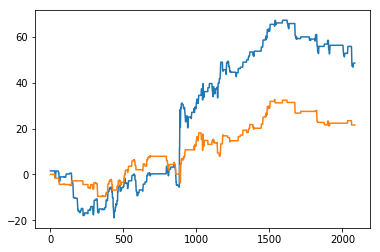

In [125]:
plt.plot(audchf['Pontos'][cut:].cumsum().values)
plt.plot(audchf['Pontos Monte Carlo'][cut:].cumsum().values)
plt.show()

sharpe_validar = []
sharpe_validar.append(sharpe(audchf, cortarA = True, corteA = cut,cortarB = True, corteB = cutB,
                             retornos ='Pontos Monte Carlo'))

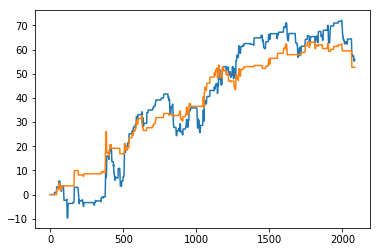

In [126]:
plt.plot(audjpy['Pontos'][cut:].cumsum().values)
plt.plot(audjpy['Pontos Monte Carlo'][cut:].cumsum().values)
plt.show()

sharpe_validar.append(sharpe(audjpy, cortarA = True, corteA = cut,cortarB = True, corteB = cutB,
                             retornos ='Pontos Monte Carlo'))

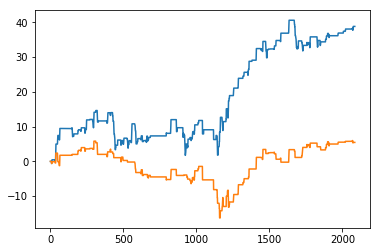

In [127]:
plt.plot(cadchf['Pontos'][cut:].cumsum().values)
plt.plot(cadchf['Pontos Monte Carlo'][cut:].cumsum().values)
plt.show()

sharpe_validar.append(sharpe(cadchf, cortarA = True, corteA = cut,cortarB = True, corteB = cutB,
                             retornos ='Pontos Monte Carlo'))

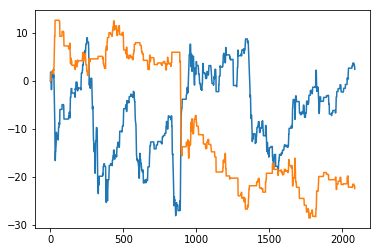

In [128]:
plt.plot(chfjpy['Pontos'][cut:].cumsum().values)
plt.plot(chfjpy['Pontos Monte Carlo'][cut:].cumsum().values)
plt.show()

sharpe_validar.append(sharpe(chfjpy, cortarA = True, corteA = cut,cortarB = True, corteB = cutB,
                             retornos ='Pontos Monte Carlo'))

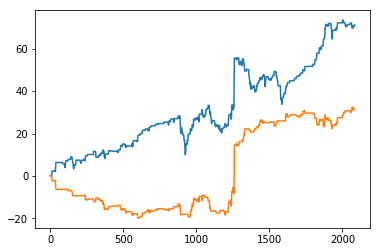

In [129]:
plt.plot(eurgbp['Pontos'][cut:].cumsum().values)
plt.plot(eurgbp['Pontos Monte Carlo'][cut:].cumsum().values)
plt.show()

sharpe_validar.append(sharpe(eurgbp, cortarA = True, corteA = cut,cortarB = True, corteB = cutB,
                             retornos ='Pontos Monte Carlo'))

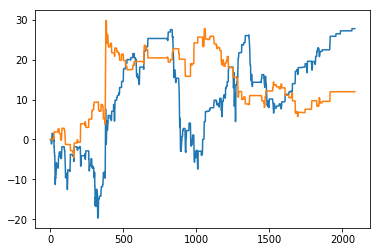

In [130]:
plt.plot(eurjpy['Pontos'][cut:].cumsum().values)
plt.plot(eurjpy['Pontos Monte Carlo'][cut:].cumsum().values)
plt.show()

sharpe_validar.append(sharpe(eurjpy, cortarA = True, corteA = cut,cortarB = True, corteB = cutB,
                             retornos ='Pontos Monte Carlo'))

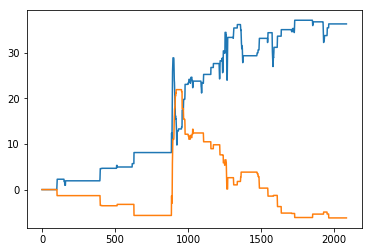

In [131]:
plt.plot(gbpchf['Pontos'][cut:].cumsum().values)
plt.plot(gbpchf['Pontos Monte Carlo'][cut:].cumsum().values)
plt.show()


sharpe_validar.append(sharpe(gbpchf, cortarA = True, corteA = cut,cortarB = True, corteB = cutB,
                             retornos ='Pontos Monte Carlo'))

In [132]:
ativos_ = ativos_.sort_values('Ativos')

In [133]:
ativos_['Sharpe Monte Carlo'] = sharpe_validar

In [136]:
ativos_.sort_values('Sharpe Monte Carlo', ascending=False)

,Ativos,Sharpe Teste,Sharpe Monte Carlo
1,AUDJPY,0.004024,0.024180
9,EURJPY,-0.042248,-0.002672
0,AUDCHF,0.003257,-0.027324
11,GBPCHF,-0.006603,-0.047157
4,CHFJPY,-0.043480,-0.082271
3,CADCHF,-0.039047,-0.124123
8,EURGBP,-0.003165,-0.128141


In [149]:
portfolio = (audjpy['Pontos']+eurjpy['Pontos']+audchf['Pontos']+gbpchf['Pontos']+
chfjpy['Pontos']+cadchf['Pontos']+eurgbp['Pontos'])

In [150]:
portfolio = pd.DataFrame(portfolio)
portfolio.columns = ['RSL']

portfolio['RSL Monte Carlo'] = (audjpy['Pontos Monte Carlo']+eurjpy['Pontos Monte Carlo']+audchf['Pontos Monte Carlo']+gbpchf['Pontos Monte Carlo']+
chfjpy['Pontos Monte Carlo']+cadchf['Pontos Monte Carlo']+eurgbp['Pontos Monte Carlo'])

In [151]:
portfolio.head()

,RSL,RSL Monte Carlo
Data,,
2004.06.22,1.358254,0.000000
2004.06.23,0.297158,0.657543
2004.06.24,1.165358,0.275820
2004.06.28,4.600952,0.000000
2004.06.29,0.000000,0.000000


In [152]:
portfolio = portfolio.reset_index()

In [153]:
portfolio.head()

,Data,RSL,RSL Monte Carlo
0,2004.06.22,1.358254,0.000000
1,2004.06.23,0.297158,0.657543
2,2004.06.24,1.165358,0.275820
3,2004.06.28,4.600952,0.000000
4,2004.06.29,0.000000,0.000000


Text(0.5,1,'RSL vs RSL Monte Carlo')

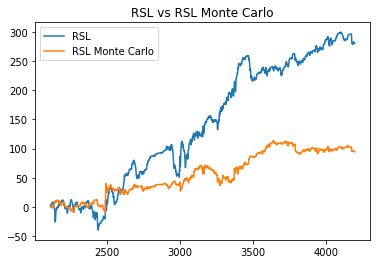

In [154]:
plt.plot(portfolio['RSL'][cut:].cumsum())
plt.plot(portfolio['RSL Monte Carlo'][cut:].cumsum())
plt.legend()
plt.title('RSL vs RSL Monte Carlo')

In [158]:
print('Sharpe RSL: ' , (np.mean(portfolio['RSL']) - (10.1/365))/np.std(portfolio['RSL'][cut:]))

Sharpe RSL:  0.11420821512751729


In [159]:
print('Sharpe RSL Monte Carlo: ' , (np.mean(portfolio['RSL Monte Carlo']) - (10.1/365))/np.std(portfolio['RSL'][cut:]))

Sharpe RSL Monte Carlo:  0.0015355575806791355


In [135]:
audjpy.to_csv('AUDJPY.csv', sep=';')
audchf.to_csv('AUDCHF.csv', sep=';')
eurgbp.to_csv('EURGBP.csv', sep=';')
gbpchf.to_csv('GBPCHF.csv', sep=';')
cadchf.to_csv('CADCHF.csv', sep=';')
eurjpy.to_csv('EURJPY.csv', sep=';')
chfjpy.to_csv('CHFJPY.csv', sep=';')


In [164]:
matrix_cor = np.corrcoef(audjpy['Pontos'],[eurjpy['Pontos'],audchf['Pontos'],gbpchf['Pontos'],
chfjpy['Pontos'],cadchf['Pontos'],eurgbp['Pontos']])

In [165]:
matrix_cor = pd.DataFrame(matrix_cor)

matrix_cor

,0,1,2,3,4,5,6
0,1.000000,0.502402,0.292724,0.064894,0.113940,0.042521,-0.080500
1,0.502402,1.000000,0.149347,0.049515,0.293196,0.003501,-0.046939
2,0.292724,0.149347,1.000000,0.219121,0.210009,0.265920,0.006801
3,0.064894,0.049515,0.219121,1.000000,0.182047,0.153621,0.228025
4,0.113940,0.293196,0.210009,0.182047,1.000000,0.096155,-0.029581
5,0.042521,0.003501,0.265920,0.153621,0.096155,1.000000,0.077524
6,-0.080500,-0.046939,0.006801,0.228025,-0.029581,0.077524,1.000000


In [166]:
matrix_cor.columns = ['AUDJPY','EURJPY','AUDCHF','GBPCHF','CHFJPY','CADCHF','EURGBP']

In [167]:
matrix_cor['Ativos'] = ['AUDJPY','EURJPY','AUDCHF','GBPCHF','CHFJPY','CADCHF','EURGBP']

In [168]:
matrix_cor = matrix_cor.set_index('Ativos')

In [169]:
matrix_cor

,AUDJPY,EURJPY,AUDCHF,GBPCHF,CHFJPY,CADCHF,EURGBP
Ativos,,,,,,,
AUDJPY,1.000000,0.502402,0.292724,0.064894,0.113940,0.042521,-0.080500
EURJPY,0.502402,1.000000,0.149347,0.049515,0.293196,0.003501,-0.046939
AUDCHF,0.292724,0.149347,1.000000,0.219121,0.210009,0.265920,0.006801
GBPCHF,0.064894,0.049515,0.219121,1.000000,0.182047,0.153621,0.228025
CHFJPY,0.113940,0.293196,0.210009,0.182047,1.000000,0.096155,-0.029581
CADCHF,0.042521,0.003501,0.265920,0.153621,0.096155,1.000000,0.077524
EURGBP,-0.080500,-0.046939,0.006801,0.228025,-0.029581,0.077524,1.000000
